<a href="https://colab.research.google.com/github/Anzhir/Attendance-System/blob/main/xo_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#df = pd.read_csv("tic-tac-toe-endgame.csv")
df=pd.read_csv("tictactoe_data.csv")
df=df.iloc[: , :10]
LE = LabelEncoder()
LE2=LabelEncoder()
enc=OneHotEncoder()

In [ ]:
df['V9'].value_counts()

-10    1440
 10     913
 0      795
Name: V9, dtype: int64

In [ ]:
df['V0'] = LE.fit_transform(df['V0'])
df['V1'] = LE.transform(df['V1'])
df['V2'] = LE.transform(df['V2'])
df['V3'] = LE.transform(df['V3'])
df['V4'] = LE.transform(df['V4'])
df['V5'] = LE.transform(df['V5'])
df['V6'] = LE.transform(df['V6'])
df['V7'] = LE.transform(df['V7'])
df['V8'] = LE.transform(df['V8'])
df['V9'] = LE2.fit_transform(df['V9'])

In [ ]:
df

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,1,1,1,1,2,2,1,2,2,2
1,1,1,1,1,2,2,2,1,2,2
2,1,1,1,1,2,2,2,2,1,2
3,1,1,1,1,2,2,2,0,0,2
4,1,1,1,1,2,2,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...
3143,1,2,2,0,0,0,1,0,0,2
3144,1,2,2,1,0,0,0,0,0,2
3145,1,2,2,0,0,0,1,0,0,2
3146,1,2,2,1,2,0,1,0,0,2


In [ ]:
X = df.drop('V9',axis=1).to_numpy()
y = df['V9'].to_numpy()
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(y.reshape(-1,1))
y=y.toarray()

In [ ]:
print(X.shape)
print(y.shape)

(3148, 9)
(3148, 3)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1)
input_shape = [X_train.shape[1]]
X_train=X_train/2
X_val=X_val/2

In [ ]:
model = keras.Sequential([
    # input layer
    #layers.BatchNormalization(input_shape=input_shape),
    # hidden layer 1
    layers.Dense(units=64, activation='relu' , input_shape=input_shape),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    # output layer
    layers.Dense(units=16, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=3, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                640       
                                                                 
 batch_normalization_6 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_7 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 32)               

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
early=EarlyStopping(monitor='val_loss' , mode='auto' , patience=10)
history =model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=600,
    epochs=200,
    #callbacks=[early]
)

Epoch 1/200
5/5 [==============================] - 2s 74ms/step - loss: 1.6108 - accuracy: 0.3184 - val_loss: 1.0887 - val_accuracy: 0.3873
Epoch 2/200
5/5 [==============================] - 0s 14ms/step - loss: 1.4036 - accuracy: 0.3738 - val_loss: 1.0870 - val_accuracy: 0.3683
Epoch 3/200
5/5 [==============================] - 0s 14ms/step - loss: 1.3216 - accuracy: 0.4130 - val_loss: 1.0865 - val_accuracy: 0.3524
Epoch 4/200
5/5 [==============================] - 0s 13ms/step - loss: 1.2483 - accuracy: 0.4338 - val_loss: 1.0855 - val_accuracy: 0.3524
Epoch 5/200
5/5 [==============================] - 0s 15ms/step - loss: 1.1858 - accuracy: 0.4603 - val_loss: 1.0831 - val_accuracy: 0.3524
Epoch 6/200
5/5 [==============================] - 0s 14ms/step - loss: 1.1438 - accuracy: 0.4914 - val_loss: 1.0789 - val_accuracy: 0.3651
Epoch 7/200
5/5 [==============================] - 0s 14ms/step - loss: 1.1340 - accuracy: 0.4741 - val_loss: 1.0738 - val_accuracy: 0.3968
Epoch 8/200
5/5 [===

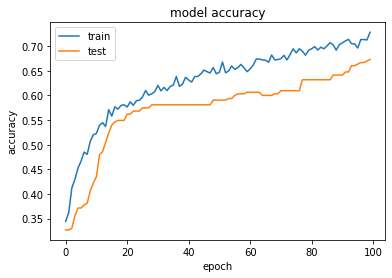

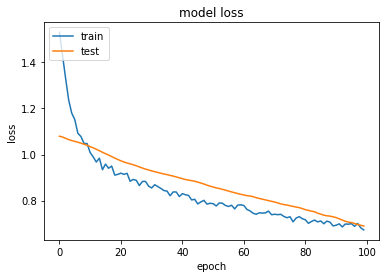

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#save the model
model.save("my_model")

INFO:tensorflow:Assets written to: my_model/assets


In [ ]:
#!pip install patool
#import patoolib
#patoolib.extract_archive("tictactoe_model.rar", outdir="my_model")
#save the model
model=keras.models.load_model("my_model")

In [ ]:
def prediction(board):
  board=np.array(board).reshape((9,))
  board=LE.transform(board)
  board=board.reshape((1,9))
  prediction=model.predict(board.reshape((1,9)))
  prediction=np.argmax(prediction)
  return prediction

In [ ]:
#[-10 , 0 , 10]
board=[
       ['X' , 'O' , ' '] , 
       ['O' , 'X' , ' '],
       [' ' , ' ' , ' ']
      ]
print(prediction(board))

[[0.8707735  0.11475319 0.01447334]]
0


In [ ]:
#[-10 , 0 , 10]
board=[
       ['X' , 'O' , 'X'] , 
       ['X' , 'X' , 'O'],
       ['O' , 'X' , 'O']
      ]
print(prediction(board))

[[0.02036724 0.6653669  0.3142658 ]]
1


In [ ]:
#[-10 , 0 , 10]
board=[
       ['O' , 'X' , 'O'],
       ['O' , 'X' , ' '],
       ['O' , ' ' , 'X']
      ]
print(prediction(board))

[[0.07930016 0.4334307  0.48726907]]
2
